In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

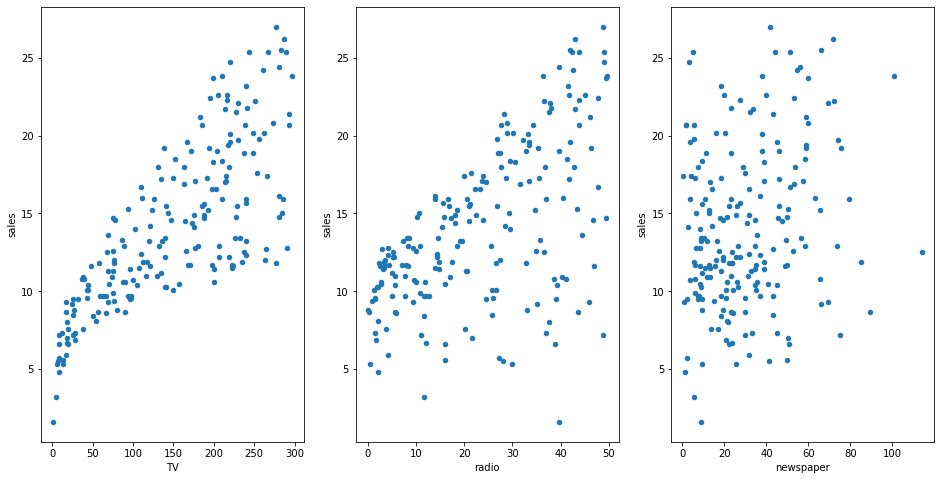

In [13]:
fig,axs = plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata2.jpg')

In [14]:
x = data[['TV']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [15]:
print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)

Intercept: 7.032593549127693
Coefficient: [0.04753664]


In [16]:
0.04753664*50 + 7.032593549127693

9.409425549127693

In [17]:
x_new = pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [18]:
lm.predict(x_new)

array([9.40942557])

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales~TV',data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
lm.rsquared

0.611875050850071

In [22]:
x_ = data[['TV','radio','newspaper']]
y = data.sales
Lm = LinearRegression()
Lm.fit(x_,y)

LinearRegression()

In [24]:
print('Intercept',Lm.intercept_)
print('TV',Lm.coef_[0])
print('radio',Lm.coef_[1])
print('newspaper',Lm.coef_[2])

Intercept 2.9388893694594067
TV 0.04576464545539761
radio 0.18853001691820462
newspaper -0.0010374930424762972


In [25]:
Lm = smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
Lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.58e-96
Time:                        12:36:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
Lm = smf.ols(formula='sales~TV+radio',data=data).fit()
Lm.rsquared

0.8971942610828957

In [28]:
Lm = smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
Lm.rsquared

0.8972106381789522

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,107.187755,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,6.051338,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,92.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,103.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,107.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,112.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,120.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,107.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,104.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,110.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,103.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

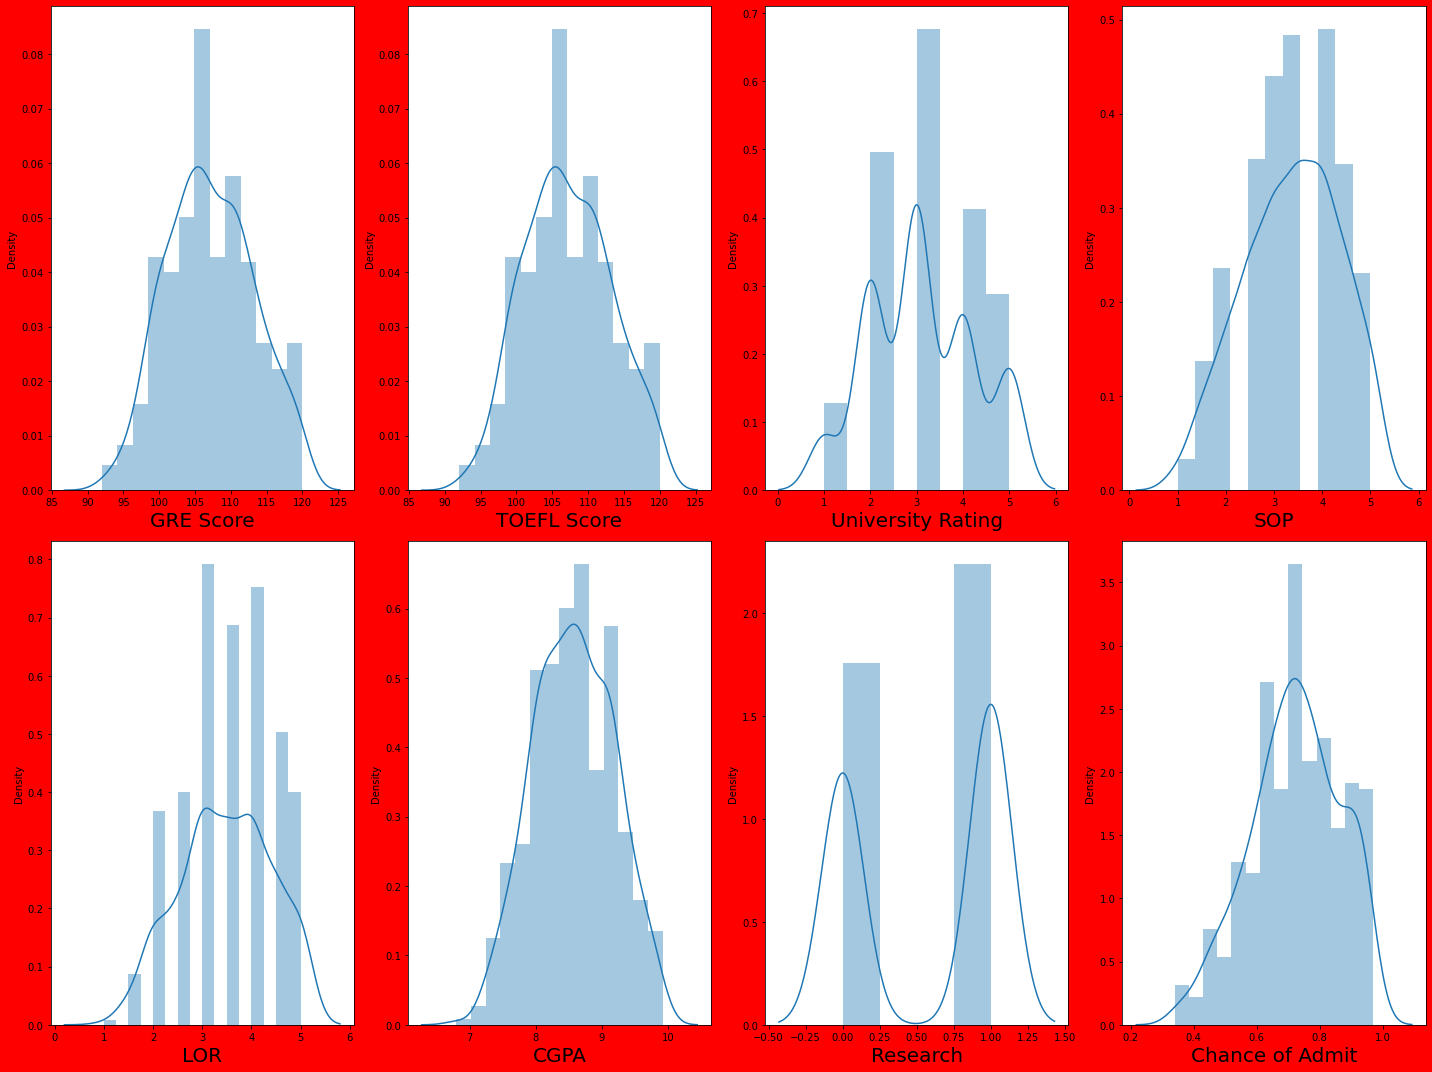

In [20]:
plt.figure(figsize =(20,15),facecolor = 'red')
plotnumber = 1
for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [23]:
y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [25]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,118.0,118.0,4.0,4.5,4.5,9.65,1
1,107.0,107.0,4.0,4.0,4.5,8.87,1
2,104.0,104.0,3.0,3.0,3.5,8.00,1
3,110.0,110.0,3.0,3.5,2.5,8.67,1
4,103.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,108.0,108.0,5.0,4.5,4.0,9.02,1
496,117.0,117.0,5.0,5.0,5.0,9.87,1
497,120.0,120.0,5.0,4.5,5.0,9.56,1
498,103.0,103.0,4.0,4.0,5.0,8.43,0


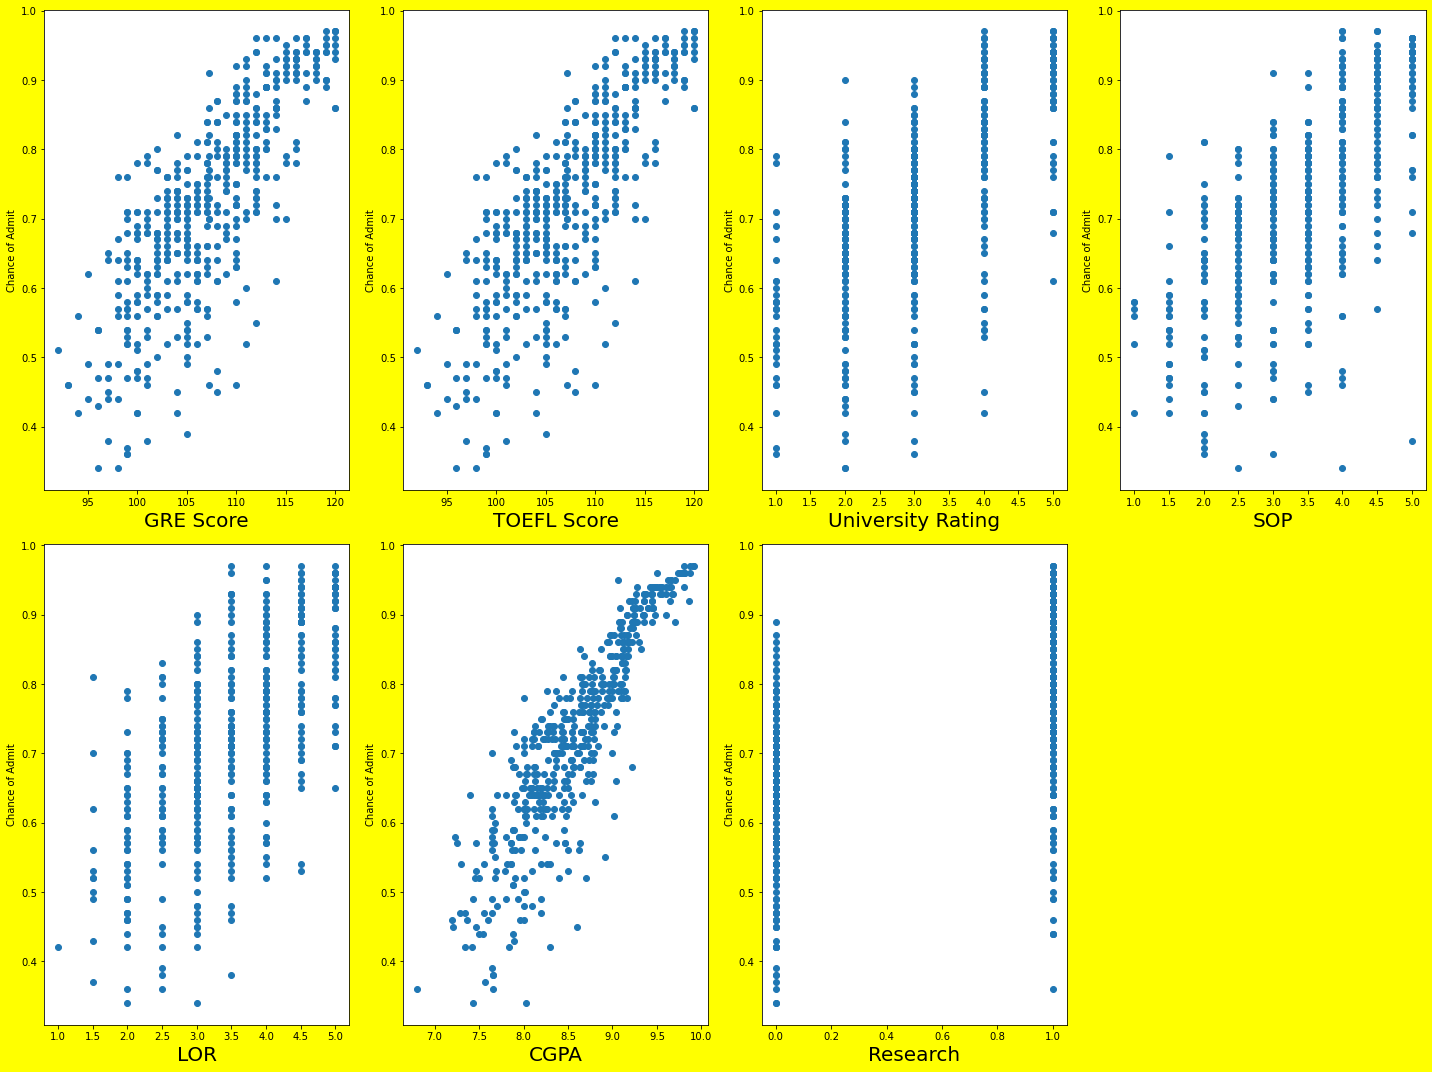

In [28]:
plt.figure(figsize =(20,15),facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Chance of Admit')
    plotnumber += 1
plt.tight_layout()

In [29]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler